<a href="https://colab.research.google.com/github/Maysk/data_science_alura/blob/main/deep_learning_parte_2/classificacao_roupas_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Imports


In [1]:
import tensorflow
from tensorflow import keras 
import numpy as np
import matplotlib.pyplot as plt


In [2]:
tensorflow.__version__

'2.8.0'

In [3]:

# tensorflow.compat.v1.disable_eager_execution()

#Carregar Dataset

In [4]:
dataset = keras.datasets.fashion_mnist

# Explorar os Dados

In [5]:
((imagens_treino, id_treino), (imagens_teste, id_teste)) = dataset.load_data();

In [6]:
nomes_de_classificacoes = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

numero_de_classificacoes = len(np.unique(id_treino))

#Exibir os dados

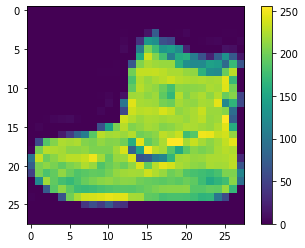

In [7]:
# for imagem in range(10):
#   plt.subplot(2, 5, imagem+1)
#   plt.imshow(imagens_treino[imagem])
#   plt.title(nomes_de_classificacoes[id_treino[imagem]])

plt.imshow(imagens_treino[0])
plt.colorbar()

# Modelo
- Criando, compilando e treinando o modelo
- Modelo foi normalizado e uma camada dropout foi utilizada (0.2)

In [8]:
#normalizacao
imagens_treino_modificada = imagens_treino / float(255)

#entrada
layer_0 = keras.layers.Flatten(input_shape=(28,28))

#processamento
layer_hidden = [
  keras.layers.Dense(16, activation=tensorflow.nn.relu),
  keras.layers.Dense(32, activation=tensorflow.nn.relu),
  keras.layers.Dropout(0.2),
  keras.layers.Dense(16, activation=tensorflow.nn.relu),
]

#saida
layer_n = keras.layers.Dense(10, activation=tensorflow.nn.softmax)

#Modelo com duas camadas
modelo = keras.Sequential([layer_0, *layer_hidden, layer_n])


modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy',])

In [9]:
modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 16)                12560     
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 10)                170       
                                                                 
Total params: 13,802
Trainable params: 13,802
Non-traina

In [10]:
historico = modelo.fit(imagens_treino_modificada, id_treino, verbose=1, epochs=5, steps_per_epoch=3000, validation_split=0.2)

Epoch 1/5
3000/3000 [==============================] - 15s 4ms/step - loss: 0.7333 - accuracy: 0.7386 - val_loss: 0.4757 - val_accuracy: 0.8346
Epoch 2/5
3000/3000 [==============================] - 7s 2ms/step - loss: 0.4914 - accuracy: 0.8284 - val_loss: 0.4299 - val_accuracy: 0.8469
Epoch 3/5
3000/3000 [==============================] - 7s 2ms/step - loss: 0.4511 - accuracy: 0.8421 - val_loss: 0.4079 - val_accuracy: 0.8556
Epoch 4/5
3000/3000 [==============================] - 8s 3ms/step - loss: 0.4280 - accuracy: 0.8495 - val_loss: 0.4184 - val_accuracy: 0.8508
Epoch 5/5
3000/3000 [==============================] - 7s 2ms/step - loss: 0.4131 - accuracy: 0.8533 - val_loss: 0.4484 - val_accuracy: 0.8431


##Visualizando as acurácias de treino e validação por época

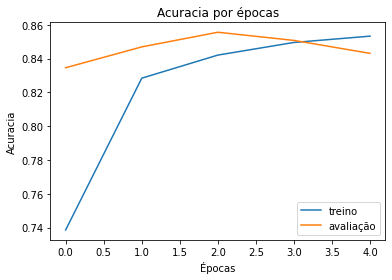

In [11]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title("Acuracia por épocas")
plt.xlabel("Épocas")
plt.ylabel("Acuracia")
plt.legend(["treino","avaliação"])

##Visualizando as perdas de treino e validação por época

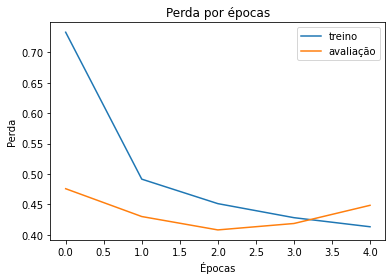

In [12]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title("Perda por épocas")
plt.xlabel("Épocas")
plt.ylabel("Perda")
plt.legend(["treino","avaliação"])

##Salvando e carregando o modelo treinado

In [13]:
modelo.save('modelo.h5')
modelo_salvo = tensorflow.keras.models.load_model('modelo.h5')

##Avaliando o modelo

In [14]:
perda_teste, acuracia_teste = modelo.evaluate(imagens_teste, id_teste, steps=50)

50/50 [==============================] - 0s 4ms/step - loss: 103.2944 - accuracy: 0.7674


In [15]:
perda_teste, acuracia_teste = modelo_salvo.evaluate(imagens_teste, id_teste, steps=50)

50/50 [==============================] - 0s 3ms/step - loss: 103.2944 - accuracy: 0.7674


# Entendendo o que foi feito

In [16]:
modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 16)                12560     
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 10)                170       
                                                                 
Total params: 13,802
Trainable params: 13,802
Non-traina

---
**O valor no params não é magia. Ele é output_size * (input_size + 1) == number_parameters.**

**Cada camada tem um bias (Por isso o input_size+1).**

Link: 
- https://stackoverflow.com/questions/2480650/what-is-the-role-of-the-bias-in-neural-networks
- https://stackoverflow.com/questions/36946671/keras-model-summary-result-understanding-the-of-parameters
---

In [17]:
pesos_da_camada_dense_0 = modelo.layers[1].get_weights()[0]
vieses_da_camada_dense_0 = modelo.layers[1].get_weights()[1]
print(f"Shape pesos:{pesos_da_camada_dense_0.shape}")
print(f"Shape vieses:{vieses_da_camada_dense_0.shape}")

Shape pesos:(784, 16)
Shape vieses:(16,)


In [18]:
#normalizacao
imagens_treino_modificada = imagens_treino / float(255)

#entrada
layer_0 = keras.layers.Flatten(input_shape=(28,28))

#processamento
layer_hidden = [
  keras.layers.Dense(16, activation=tensorflow.nn.relu),
  keras.layers.Dense(32, activation=tensorflow.nn.relu),
  keras.layers.Dropout(0.2),
  keras.layers.Dense(16, activation=tensorflow.nn.relu),
]

#saida
layer_n = keras.layers.Dense(10, activation=tensorflow.nn.softmax)

#Modelo com duas camadas
modelo = keras.Sequential([layer_0, *layer_hidden, layer_n])

adam = keras.optimizers.Adam(lr=0.001)


modelo.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics=['accuracy',])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [19]:
'''
 # Pode matar a rede  
 pesos_da_camada_dense_0_zerados = np.zeros(pesos_da_camada_dense_0.shape)
 vieses_da_camada_dense_0_zerados = np.zeros(vieses_da_camada_dense_0.shape)
 modelo.layers[1].set_weights([pesos_da_camada_dense_0_zerados, vieses_da_camada_dense_0_zerados ])
'''

# Pode ocorrer vanish gradients 
# pesos_da_camada_dense_0_aleatorios = np.random.rand(*pesos_da_camada_dense_0.shape)
# vieses_da_camada_dense_0_zerados = np.zeros(vieses_da_camada_dense_0.shape)
# modelo.layers[1].set_weights([pesos_da_camada_dense_0_aleatorios, vieses_da_camada_dense_0_zerados])


'\n # Pode matar a rede  \n pesos_da_camada_dense_0_zerados = np.zeros(pesos_da_camada_dense_0.shape)\n vieses_da_camada_dense_0_zerados = np.zeros(vieses_da_camada_dense_0.shape)\n modelo.layers[1].set_weights([pesos_da_camada_dense_0_zerados, vieses_da_camada_dense_0_zerados ])\n'

In [20]:
callbacks = [
  keras.callbacks.EarlyStopping(monitor='val_accuracy'), 
  keras.callbacks.ModelCheckpoint(filepath='melhor_modelo_acc.h5', monitor='val_accuracy', save_best_only=True)
]

historico = modelo.fit(
    imagens_treino_modificada, 
    id_treino, 
    epochs=20,
    batch_size=50, 
    validation_split=0.3,
    callbacks= callbacks)

Epoch 1/20
840/840 [==============================] - 4s 4ms/step - loss: 0.8490 - accuracy: 0.6874 - val_loss: 0.5298 - val_accuracy: 0.8177
Epoch 2/20
840/840 [==============================] - 3s 4ms/step - loss: 0.5397 - accuracy: 0.8106 - val_loss: 0.4515 - val_accuracy: 0.8365


In [21]:
perda_teste, acuracia_teste = modelo.evaluate(imagens_teste, id_teste, batch_size=50)

200/200 [==============================] - 1s 3ms/step - loss: 66.4502 - accuracy: 0.8062


In [22]:
acuracia_teste

0.8062000274658203

In [23]:
perda_teste

66.45024108886719

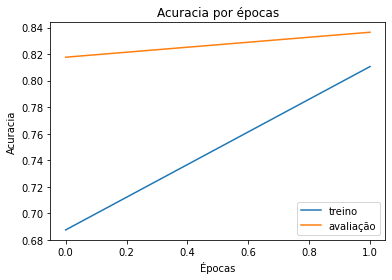

In [24]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title("Acuracia por épocas")
plt.xlabel("Épocas")
plt.ylabel("Acuracia")
plt.legend(["treino","avaliação"])

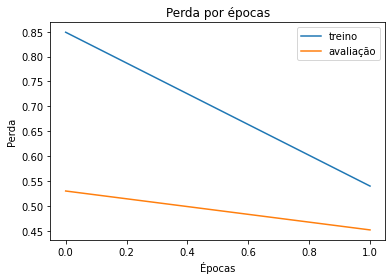

In [25]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title("Perda por épocas")
plt.xlabel("Épocas")
plt.ylabel("Perda")
plt.legend(["treino","avaliação"])

# Configuracoes da Rede

> Link do artigo (ou paper): http://jmlr.org/proceedings/papers/v9/glorot10a/glorot10a.pdf


In [26]:
modelo.get_config()
# GlorotUniform (AKA algoritmo de Xavier) -> Utilizado para inicializar


{'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 28, 28),
    'dtype': 'float32',
    'name': 'flatten_1_input',
    'ragged': False,
    'sparse': False}},
  {'class_name': 'Flatten',
   'config': {'batch_input_shape': (None, 28, 28),
    'data_format': 'channels_last',
    'dtype': 'float32',
    'name': 'flatten_1',
    'trainable': True}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'kernel_regularizer': None,
    'name': 'dense_4',
    'trainable': True,
    'units': 16,
    'use_bias': True}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'bias_constraint': None,
    'bias_ini